# 05 — Analyse descriptive (figures pour rapport)
Ce notebook produit des **figures interprétables** (saisonnalité mensuelle, profils journaliers moyens). Ces graphiques sont destinés à être réutilisés dans un rapport/soutenance.


In [11]:
import os


if os.getcwd().endswith("notebooks"):
    os.chdir("..")

print(f"Current Working Directory: {os.getcwd()}")


Current Working Directory: /home/onyxia/work/france-grid-stress-prediction


In [12]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_ROOT = Path('.').resolve()
DATA_PROCESSED = PROJECT_ROOT / 'data' / 'processed'
OUTPUT_FIG = PROJECT_ROOT / 'outputs' / 'figures'
OUTPUT_FIG.mkdir(parents=True, exist_ok=True)

PATH = DATA_PROCESSED / 'consommation_clean.parquet'
assert PATH.exists(), f'Fichier introuvable: {PATH}'

df = pd.read_parquet(PATH)
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)
df.head()

,datetime,load_mw
0,2010-01-01 00:00:00,53067
1,2010-01-01 00:30:00,52303
2,2010-01-01 01:00:00,52272
3,2010-01-01 01:30:00,52013
4,2010-01-01 02:00:00,52099


## Paramètres

In [13]:
YEAR = 2010  # changer ici si besoin
df_y = df[df['datetime'].dt.year == YEAR].copy()
df_y.shape, df_y['datetime'].min(), df_y['datetime'].max()

((17520, 2),
 Timestamp('2010-01-01 00:00:00'),
 Timestamp('2010-12-31 23:30:00'))

## 1) Saisonnalité mensuelle (boxplots)

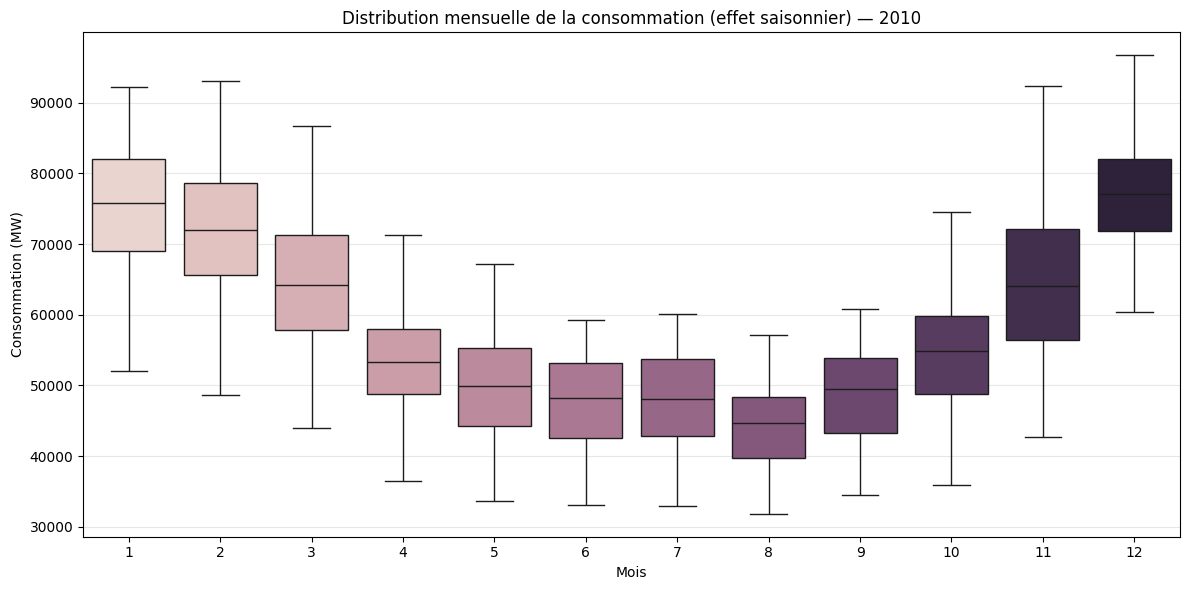

In [14]:
df_y['month'] = df_y['datetime'].dt.month

plt.figure(figsize=(12,6))
# seaborn: palette sans hue -> warning futur, donc on force hue=month et legend=False
sns.boxplot(data=df_y, x='month', y='load_mw', hue='month', legend=False)
plt.title(f'Distribution mensuelle de la consommation (effet saisonnier) — {YEAR}')
plt.xlabel('Mois')
plt.ylabel('Consommation (MW)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(OUTPUT_FIG / f'saisonnalite_mensuelle_{YEAR}.png', dpi=150)
plt.show()

## 2) Profils moyens par jour de la semaine

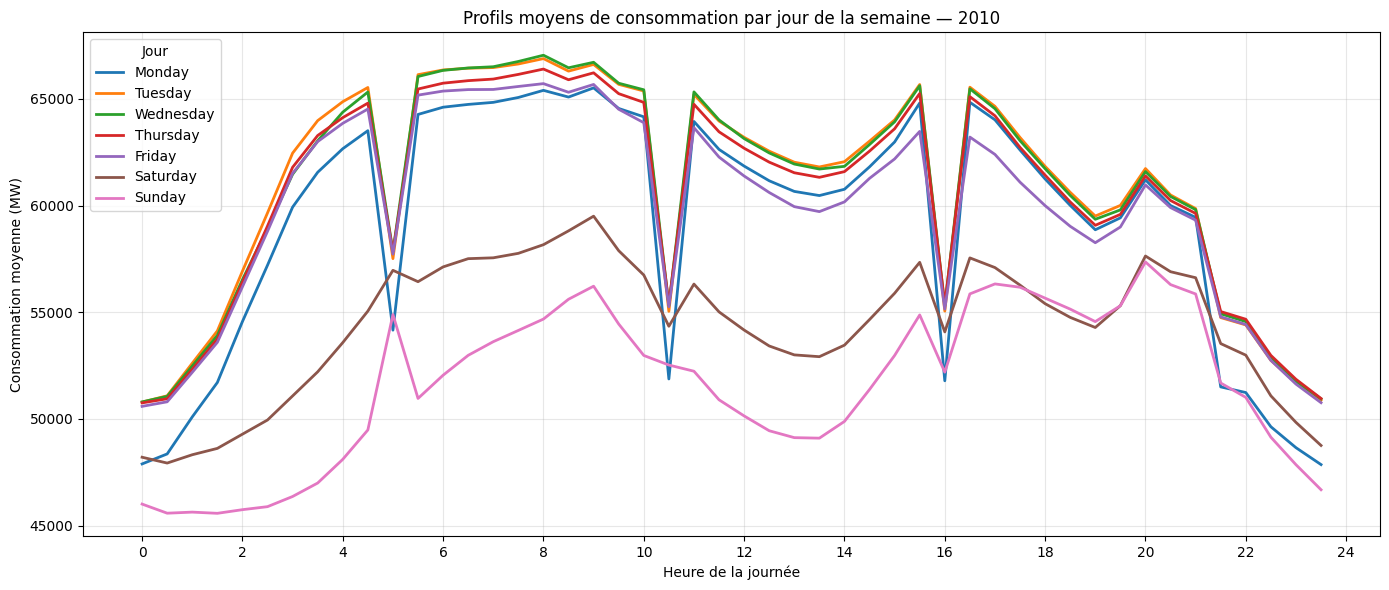

In [15]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_y['day_name'] = pd.Categorical(
    df_y['datetime'].dt.day_name(),
    categories=days_order,
    ordered=True
)

df_y['hour_float'] = df_y['datetime'].dt.hour + df_y['datetime'].dt.minute / 60

daily_profile = (
    df_y.groupby(['day_name', 'hour_float'], observed=True)['load_mw']
       .mean()
       .reset_index()
)

plt.figure(figsize=(14,6))
sns.lineplot(
    data=daily_profile,
    x='hour_float',
    y='load_mw',
    hue='day_name',
    linewidth=2
)
plt.title(f'Profils moyens de consommation par jour de la semaine — {YEAR}')
plt.xlabel('Heure de la journée')
plt.ylabel('Consommation moyenne (MW)')
plt.xticks(range(0, 25, 2))
plt.grid(True, alpha=0.3)
plt.legend(title='Jour', loc='upper left')
plt.tight_layout()
plt.savefig(OUTPUT_FIG / f'profils_hebdomadaires_{YEAR}.png', dpi=150)
plt.show()

## 3) Tendance globale de la consommation éléctrique


In [17]:

df_2010 = df[df["datetime"].dt.year == 2010].copy()

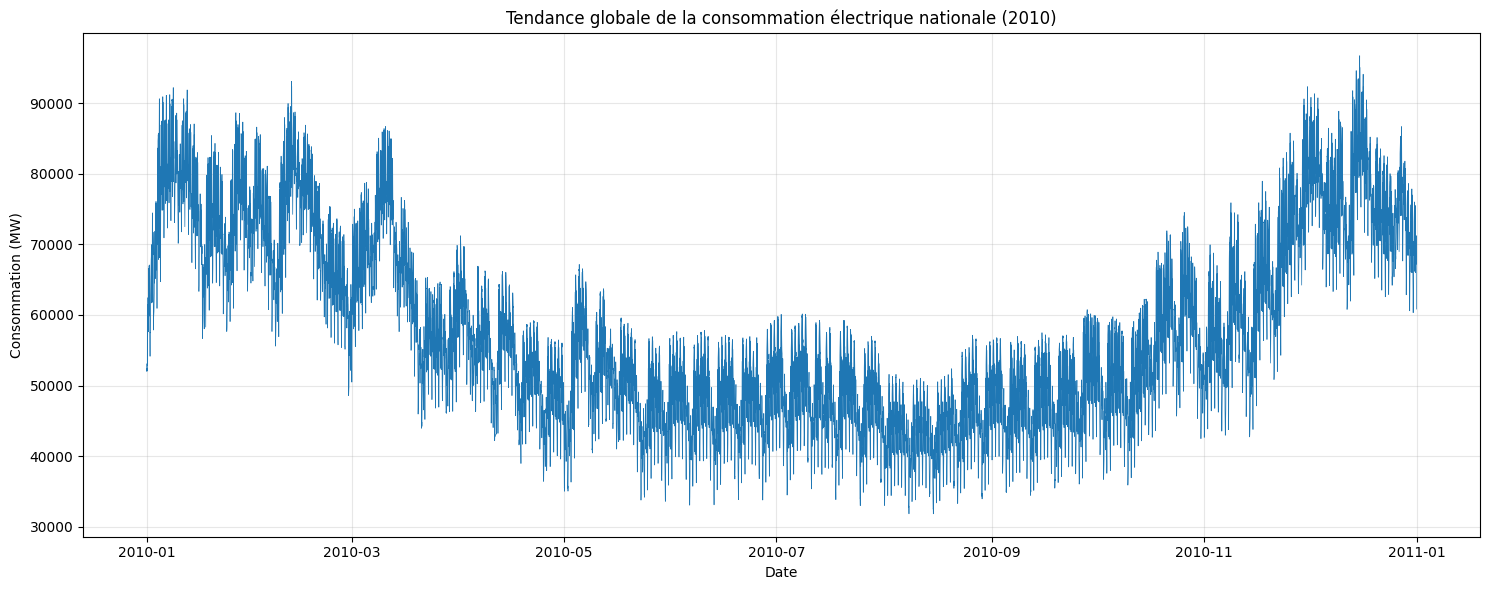

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(df_2010["datetime"], df_2010["load_mw"], linewidth=0.5)

plt.title("Tendance globale de la consommation électrique nationale (2010)")
plt.xlabel("Date")
plt.ylabel("Consommation (MW)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("tendance_globale.png")
plt.show()

## Interprétation (à compléter)
- Saisonnalité: niveaux plus élevés en hiver, plus bas en été.
- Effet jour de semaine: jours ouvrés > week-end, avec profils intrajournaliers distincts.
